In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv



## 1. Exploratory Data Analysis
<font color = "blue">

In [2]:
sample_submission= pd.read_csv("../input/dogs-vs-cats/sampleSubmission.csv")
sample_submission

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [3]:
import os
import zipfile

The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [4]:
local_zip = '../input/dogs-vs-cats/train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/kaggle/working/')
zip_ref.close()

Let's define each of these directories:

In [5]:
base_dir = '/kaggle/working/'
train_dir = os.path.join(base_dir, 'train')
train_img_names = os.listdir(train_dir)

In [6]:
train_img_names[:10]

['dog.6660.jpg',
 'cat.2528.jpg',
 'cat.8137.jpg',
 'cat.11422.jpg',
 'dog.4146.jpg',
 'cat.11800.jpg',
 'cat.3071.jpg',
 'cat.9752.jpg',
 'cat.5539.jpg',
 'cat.616.jpg']

In [7]:
print('total training images :', len(train_img_names ))

total training images : 25000


In [8]:
categories= list()
for image in train_img_names:
    category = image.split(".")[0]
    if category == "dog":
        categories.append("dog")
    else:
        categories.append("cat")
df= pd.DataFrame({"Image":train_img_names, "Category": categories})
    

In [9]:
df.head()

,Image,Category
0,dog.6660.jpg,dog
1,cat.2528.jpg,cat
2,cat.8137.jpg,cat
3,cat.11422.jpg,cat
4,dog.4146.jpg,dog


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

<AxesSubplot:xlabel='Category', ylabel='count'>

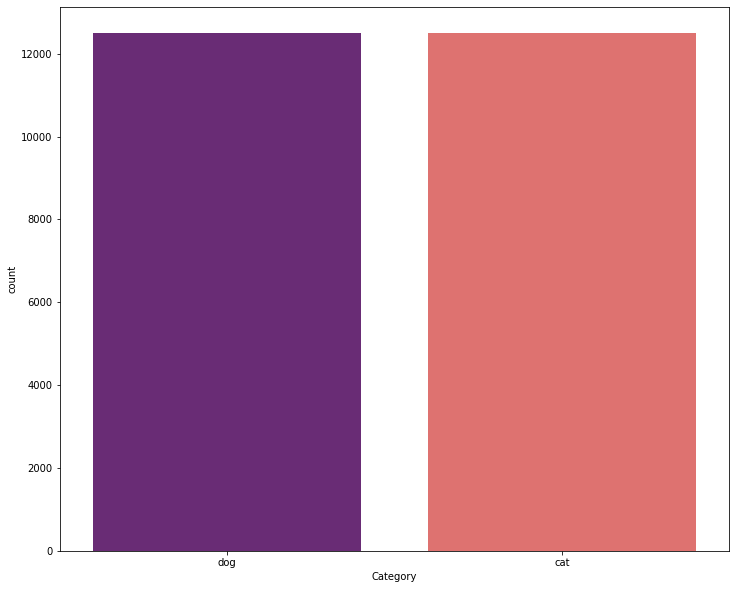

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x="Category",palette="magma")

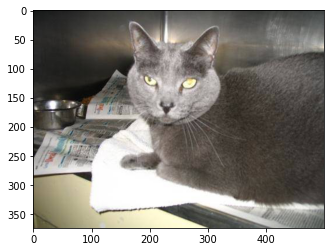

In [12]:
sample = random.choice(train_img_names)
plt.imshow(plt.imread(("/kaggle/working/train/"+sample)))


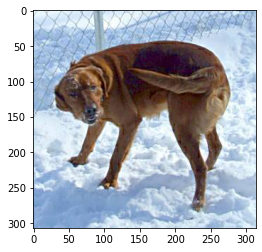

In [13]:
sample = random.choice(train_img_names)
plt.imshow(plt.imread(("/kaggle/working/train/"+sample)))


In [14]:
from sklearn.model_selection import train_test_split
train,validation= train_test_split(df, test_size=0.1)
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)



In [15]:
train

,Image,Category
0,dog.4616.jpg,dog
1,cat.7354.jpg,cat
2,cat.8612.jpg,cat
3,dog.7246.jpg,dog
4,cat.7092.jpg,cat
...,...,...
22495,dog.3800.jpg,dog
22496,dog.626.jpg,dog
22497,cat.10751.jpg,cat
22498,cat.1851.jpg,cat


In [16]:
validation

,Image,Category
0,cat.3710.jpg,cat
1,cat.9659.jpg,cat
2,dog.8216.jpg,dog
3,cat.5052.jpg,cat
4,dog.620.jpg,dog
...,...,...
2495,dog.354.jpg,dog
2496,dog.9172.jpg,dog
2497,dog.7817.jpg,dog
2498,cat.9835.jpg,cat


<AxesSubplot:xlabel='Category', ylabel='count'>

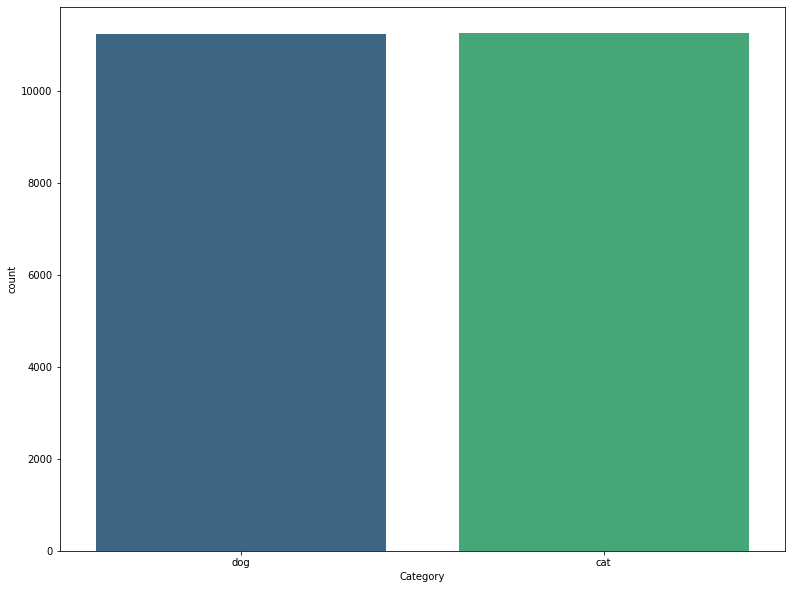

In [17]:
plt.figure(figsize=(13,10))
sns.countplot(data=train, x="Category",palette="viridis")

<AxesSubplot:xlabel='Category', ylabel='count'>

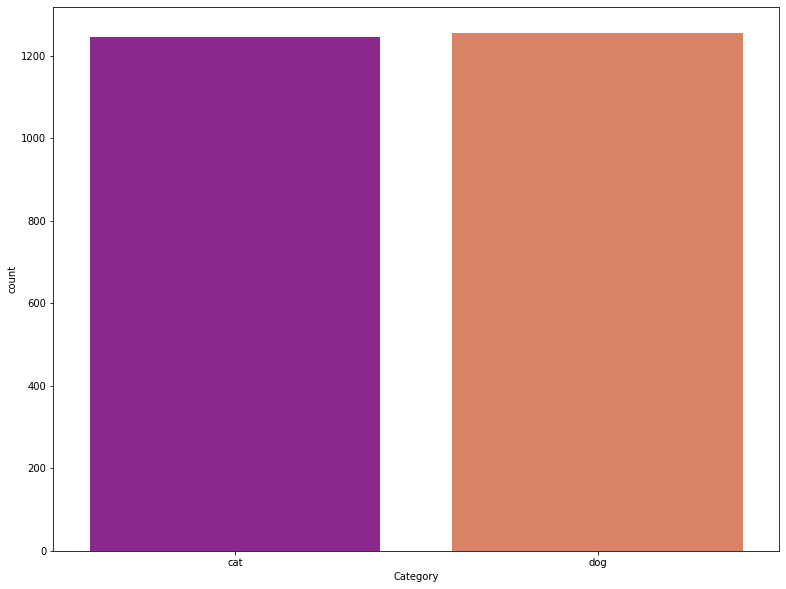

In [18]:
plt.figure(figsize=(13,10))
sns.countplot(data=validation, x="Category",palette="plasma")

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory="./train",
                                                    x_col='Image',
                                                    y_col='Category',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))    



Found 22500 validated image filenames belonging to 2 classes.


In [20]:
validation_datagen  = ImageDataGenerator( rescale = 1.0/255.)
validation_generator =  validation_datagen.flow_from_dataframe(validation,
                                                            directory="./train",
                                                              x_col='Image',
                                                             y_col='Category',
                                                              batch_size=20,
                                                              class_mode  = 'binary',
                                                              target_size = (150, 150))

Found 2500 validated image filenames belonging to 2 classes.


## 2. Building a Small Model from Scratch 

In [21]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [24]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
callback=EarlyStopping(monitor="val_loss", patience=4)
history=model.fit(train_generator, validation_data=validation_generator, epochs=15,callbacks=[callback])

Epoch 1/15
1125/1125 [==============================] - 703s 624ms/step - loss: 0.7341 - accuracy: 0.5636 - val_loss: 0.5701 - val_accuracy: 0.7172
Epoch 2/15
1125/1125 [==============================] - 728s 647ms/step - loss: 0.5118 - accuracy: 0.7453 - val_loss: 0.4411 - val_accuracy: 0.7956
Epoch 3/15
1125/1125 [==============================] - 728s 648ms/step - loss: 0.4251 - accuracy: 0.8039 - val_loss: 0.4073 - val_accuracy: 0.8120
Epoch 4/15
1125/1125 [==============================] - 724s 644ms/step - loss: 0.3428 - accuracy: 0.8452 - val_loss: 0.4102 - val_accuracy: 0.8132
Epoch 5/15
1125/1125 [==============================] - 727s 646ms/step - loss: 0.2679 - accuracy: 0.8837 - val_loss: 0.3914 - val_accuracy: 0.8268
Epoch 6/15
1125/1125 [==============================] - 718s 638ms/step - loss: 0.1907 - accuracy: 0.9212 - val_loss: 0.4231 - val_accuracy: 0.8160
Epoch 7/15
1125/1125 [==============================] - 703s 625ms/step - loss: 0.1210 - accuracy: 0.9543 - val_

## 3. Performance Evaluation of the Training

In [28]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.645133,0.622622,0.570066,0.7172
1,0.488898,0.761556,0.441077,0.7956
2,0.411998,0.810667,0.407321,0.8120
3,0.346655,0.845422,0.410238,0.8132
4,0.273452,0.882578,0.391421,0.8268
5,0.195771,0.920222,0.423107,0.8160
6,0.129526,0.949778,0.479488,0.8280
7,0.099222,0.963600,0.617844,0.8228
8,0.069322,0.975956,0.674334,0.8336


<AxesSubplot:>

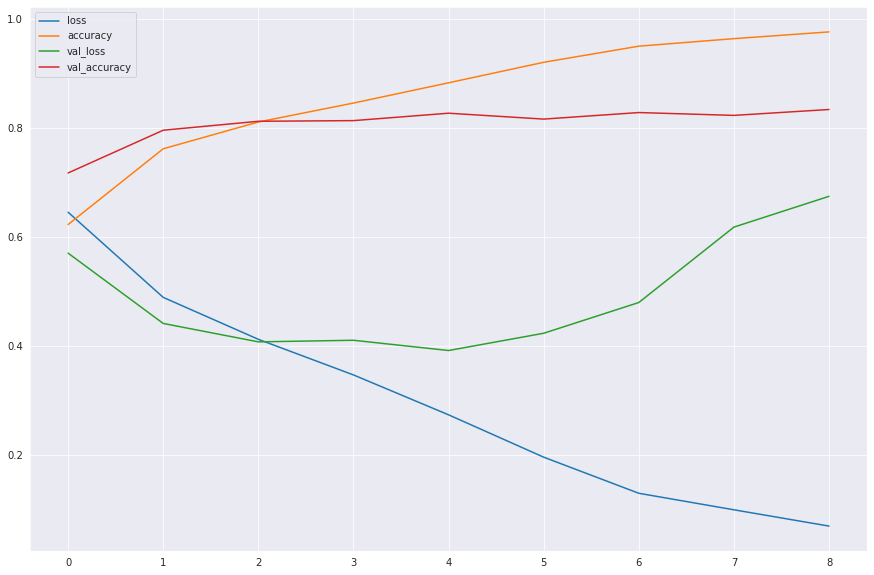

In [31]:
sns.set_style("darkgrid")
pd.DataFrame(model.history.history).plot(figsize=(15,10))

## 4. Preparing Test Data and Submission

In [46]:
# Extracting the zip file

test_zip = '/kaggle/input/dogs-vs-cats/test1.zip'
zip_ref = zipfile.ZipFile(test_zip, 'r')
zip_ref.extractall('/kaggle/working')
zip_ref.close()

test_dir = '/kaggle/working/test1/'
test_images = os.listdir(os.path.join(test_dir))
test_images[:10]



['11453.jpg',
 '6484.jpg',
 '1503.jpg',
 '3475.jpg',
 '4725.jpg',
 '10029.jpg',
 '5284.jpg',
 '8757.jpg',
 '2754.jpg',
 '10107.jpg']

In [48]:
test_df = pd.DataFrame({'Image': test_images})
test_df.head()

,Image
0,11453.jpg
1,6484.jpg
2,1503.jpg
3,3475.jpg
4,4725.jpg


In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  directory="/kaggle/working/test1",
                                                 x_col="Image",
                                                 y_col=None,
                                                  class_mode  = None,
                                                 target_size=(150,150),
                                                shuffle = True,
                                                batch_size=20)
    


Found 12500 validated image filenames.


In [55]:
predictions = model.predict(test_generator,steps = np.ceil(12500/20))
predictions

array([[1.        ],
       [0.12018743],
       [0.99997604],
       ...,
       [0.9757816 ],
       [0.05579337],
       [0.00255001]], dtype=float32)

In [60]:
test_df["category"]=pd.DataFrame(predictions, columns=["category"])
test_df

,Image,category
0,11453.jpg,1.000000
1,6484.jpg,0.120187
2,1503.jpg,0.999976
3,3475.jpg,0.980308
4,4725.jpg,0.479529
...,...,...
12495,6350.jpg,0.000014
12496,10578.jpg,0.000014
12497,3631.jpg,0.975782
12498,1532.jpg,0.055793


In [64]:
def labelizor(prediction):
    if prediction > 0.5:
        return 1
    else:
        return 0

In [66]:

test_df["category"] = test_df["category"].apply(labelizor)
test_df

,Image,category
0,11453.jpg,1
1,6484.jpg,0
2,1503.jpg,1
3,3475.jpg,1
4,4725.jpg,0
...,...,...
12495,6350.jpg,0
12496,10578.jpg,0
12497,3631.jpg,1
12498,1532.jpg,0


<AxesSubplot:xlabel='category', ylabel='count'>

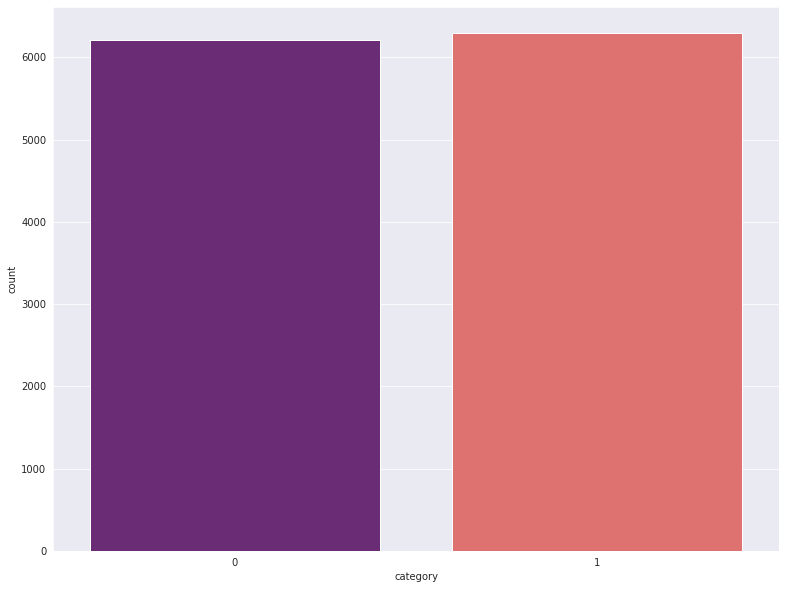

In [68]:
plt.figure(figsize=(13,10))
sns.countplot(data=test_df, x="category",palette="magma")

In [73]:
test_df=test_df.reset_index()
test_df

,index,Image,category
0,0,11453.jpg,1
1,1,6484.jpg,0
2,2,1503.jpg,1
3,3,3475.jpg,1
4,4,4725.jpg,0
...,...,...,...
12495,12495,6350.jpg,0
12496,12496,10578.jpg,0
12497,12497,3631.jpg,1
12498,12498,1532.jpg,0


In [75]:
test_df=test_df.rename(columns={"index": "id"})
test_df

,id,Image,category
0,0,11453.jpg,1
1,1,6484.jpg,0
2,2,1503.jpg,1
3,3,3475.jpg,1
4,4,4725.jpg,0
...,...,...,...
12495,12495,6350.jpg,0
12496,12496,10578.jpg,0
12497,12497,3631.jpg,1
12498,12498,1532.jpg,0


In [76]:
submission_df=test_df.copy()
submission_df.drop("Image", axis=1, inplace=True)
submission_df

,id,category
0,0,1
1,1,0
2,2,1
3,3,1
4,4,0
...,...,...
12495,12495,0
12496,12496,0
12497,12497,1
12498,12498,0


In [78]:

submission_df.to_csv('submission.csv', index=False)